#### Import necessary packages

In [47]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### Data preprocessing

In [48]:
# read the data
df = pd.read_csv("/content/dal_final.csv")
df.head()

,Date,Close,Volume
0,2007-06-01,16.945208,2299400.0
1,2007-06-04,16.329809,5692700.0
2,2007-06-05,16.425148,4510000.0
3,2007-06-06,16.407816,2595300.0
4,2007-06-07,16.017773,3062100.0


In [49]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [50]:
# create sequences
X, y = [], []
window = 60
n_future = 1
for i in range(len(scaled_df) - window - n_future - 1):
  X.append(scaled_df[i:i+window])
  y.append(scaled_df[i+window+n_future])
X = np.array(X)
y = np.array(y)

In [51]:
# split it to train and test
breakpoint = int(len(X) * 0.8)
X_train, y_train = X[:breakpoint], y[:breakpoint]
X_test, y_test = X[breakpoint:], y[breakpoint:]

In [52]:
X_train.shape

(3374, 60, 1)

In [53]:
# build the model
model = Sequential()
model.add(Input(shape=(window, 1)))
model.add(LSTM(units=64, return_sequences=True, activation="relu"))
model.add(LSTM(units=32, return_sequences=True, activation="relu"))
model.add(LSTM(units=16, activation="relu"))
model.add(Dense(units=1))

In [54]:
model.compile(optimizer='adam', loss='mse')

In [55]:
# train the model
epochs = 20
model.fit(X_train, y_train, epochs=epochs, batch_size=32, shuffle=False)

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0083
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0094
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0096
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0109
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0167
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0228
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0173
Epoch 9/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129
Epoch 10/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0095
Epoch 11/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0082
Epoch 12/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0061
Epoch 13/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0087
Epoch 14/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0127
Epoch 15/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2

In [56]:
yhat = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [57]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print(f"RMSE: {rmse}")

RMSE: 0.049160916669763015


In [58]:
r2_score = r2_score(y_test, yhat)
print(f"R2 Score: {r2_score}")

R2 Score: 0.7291841417239426


In [59]:
yhat_actual = scaler.inverse_transform(yhat.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [60]:
yhat_actual

array([[39.583523],
       [39.656815],
       [39.702698],
       [39.690342],
       [39.63685 ],
       [39.535366],
       [39.44149 ],
       [39.3144  ],
       [39.15759 ],
       [39.0088  ],
       [38.90632 ],
       [38.884377],
       [38.94098 ],
       [39.10077 ],
       [39.32511 ],
       [39.590874],
       [39.867348],
       [40.144764],
       [40.436203],
       [40.7237  ],
       [40.993515],
       [41.262035],
       [41.56463 ],
       [41.90176 ],
       [42.279774],
       [42.645817],
       [42.970474],
       [43.244053],
       [43.46742 ],
       [43.645607],
       [43.75412 ],
       [43.782024],
       [43.782974],
       [43.76759 ],
       [43.749138],
       [43.743332],
       [43.78266 ],
       [43.885914],
       [44.00428 ],
       [44.142742],
       [44.261772],
       [44.349632],
       [44.384193],
       [44.31216 ],
       [44.15312 ],
       [43.973892],
       [43.813835],
       [43.67947 ],
       [43.607   ],
       [43.57902 ],


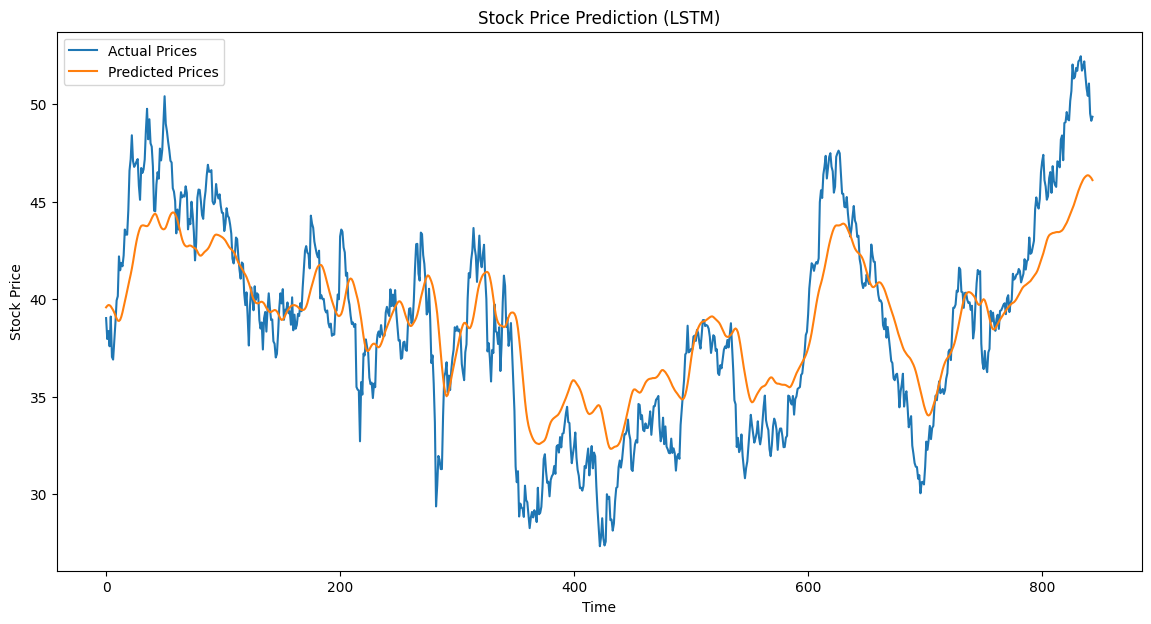

In [61]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(yhat_actual, label='Predicted Prices')
plt.title('Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [63]:
model.save('/content/best.keras')